# Домашнее задание

# 1 - Уменьшение палитры изображения (суммарно 6 баллов)
Для <a href='https://thumbs.dreamstime.com/x/two-lorikeet-birds-2293918.jpg'> картинки </a> нужно уменьшить число цветов в палитре.

Для этого нужно выделить **кластеры в пространстве RGB**, объекты соответствуют пикселям изображения. После выделения кластеров, все пиксели, отнесенные в один кластер, заполняются одним цветом; этот цвет может быть центроидом соответствующего кластера, медианным цветом по кластеру.

Попробуйте различные алгоритмы кластеризации:

* KMeans
* DBSCAN
* AgglomerativeClustering

Рассмотрите число кластеров K = 2, 3, 10, 20 (в алгоритмах, где есть такой гиперпараметр).

Для различных кластеризаций оцените и сравните потери от уменьшения цветов при помощи метрики 
<a href='http://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.compare_ssim'> SSIM </a>. Какой способ оказался лучшим?

Задание оценивает в 5 баллов.

Еще 1 балл даётся за запуск алгоритма на выбранных вами картинках - на них результат должен получиться красивым.

Вот вам вспомогательные функции для считывания и вывода изображений:

In [ ]:
import matplotlib.pyplot as plt
import cv2 # нужно поставить себе cv2 через conda install opencv

def draw_picture(image, bgr=False):
    b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.show()

img - это обычный трехмерный массив цветов пикселей, где две первые координаты - это координаты каждого пикселя, и третья обозначает R, G или B.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive/homeworks/two-lorikeet-birds-2293918.jpg

/content/drive/MyDrive/homeworks/two-lorikeet-birds-2293918.jpg


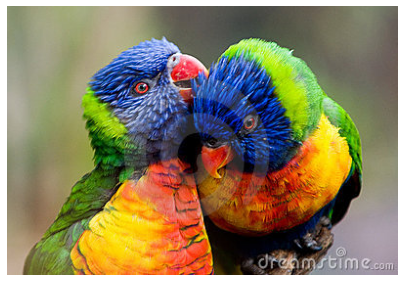

In [ ]:
img = cv2.imread('/content/drive/MyDrive/homeworks/two-lorikeet-birds-2293918.jpg') # считать картинку
draw_picture(img) # нарисовать картинку

In [ ]:
print(img.shape) # сам img - это обычный трехмерный массив 275 x 400 x 3
# вам скорее все кстати понадобится сделать reshape, чтобы перейти от 275x400 к одномерному массиву пикселей

(275, 400, 3)


In [ ]:
X = img.reshape(-1, 1)

In [ ]:
X.shape

(330000, 1)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from skimage.metrics import structural_similarity
import numpy as np

# Сперва воспользуемся KMeans:

In [ ]:
model = KMeans(n_clusters=2, random_state=42)
y_pred = model.fit_predict(X)

In [ ]:
n_clusters = range(2)
X_KMeans_2 = X
for cluster in n_clusters:
    elements_of_cluster = np.where(y_pred == cluster, X_KMeans_2.reshape(-1), np.nan)
    elements_of_cluster = elements_of_cluster[np.logical_not(np.isnan(elements_of_cluster))] #удалил наны
    X_KMeans_2 = np.where(y_pred == cluster, elements_of_cluster.mean(), X_KMeans_2.reshape(-1))

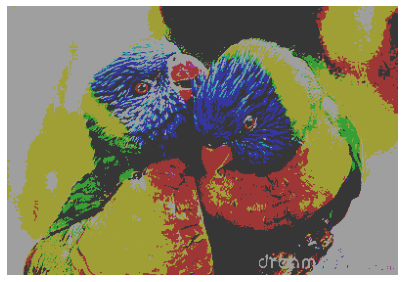

In [ ]:
draw_picture(X_KMeans_2.reshape(275, 400, 3).astype('uint8'))

In [ ]:
n_clusters = range(2)
X_KMeans_2_meadian = X
for cluster in n_clusters:
    elements_of_cluster = np.where(y_pred == cluster, X_KMeans_2_meadian.reshape(-1), np.nan)
    elements_of_cluster = elements_of_cluster[np.logical_not(np.isnan(elements_of_cluster))] #удалил наны
    X_KMeans_2_meadian = np.where(y_pred == cluster, np.median(elements_of_cluster), X_KMeans_2_meadian.reshape(-1))

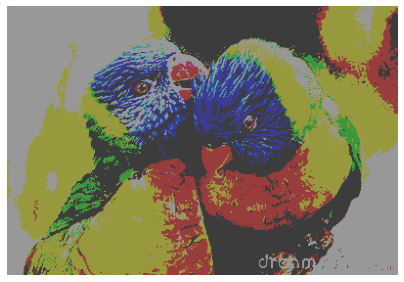

In [ ]:
draw_picture(X_KMeans_2_meadian.reshape(275, 400, 3).astype('uint8'))

Вижу, что нет разницы брать медианное или среднее значение, поэтому просто буду брать среднее

In [ ]:
img_KMeans_2 = X_KMeans_2.reshape(275, 400, 3).astype('uint8')
img_KMeans_2_meadian = X_KMeans_2_meadian.reshape(275, 400, 3).astype('uint8')

In [ ]:
print(structural_similarity(img, img_KMeans_2, multichannel=True))
print(structural_similarity(img, img_KMeans_2_meadian, multichannel=True))

0.5710236851191849
0.5738103789863455


В третьем знаке после запятой есть разница, поэтому ок, будем брать медианное значение

Теперь рассмотрим количество кластеров = 3, 10 и 20 посмотрим на картинки и рассчитаем на них метрику SSIM

SSIM =  0.6993703450441634


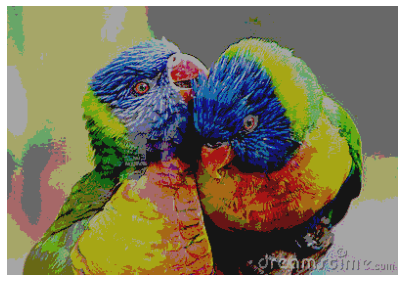

In [ ]:
model = KMeans(n_clusters=3, random_state=42)
y_pred = model.fit_predict(X)

n_clusters = range(3)
X_KMeans_3 = X
for cluster in n_clusters:
    elements_of_cluster = np.where(y_pred == cluster, X_KMeans_3.reshape(-1), np.nan)
    elements_of_cluster = elements_of_cluster[np.logical_not(np.isnan(elements_of_cluster))] #удалил наны
    X_KMeans_3 = np.where(y_pred == cluster, np.median(elements_of_cluster), X_KMeans_3.reshape(-1))

img_KMeans_3 = X_KMeans_3.reshape(275, 400, 3).astype('uint8')
print('SSIM = ', structural_similarity(img, img_KMeans_3, multichannel=True))
draw_picture(img_KMeans_3)

SSIM =  0.8831892064279532


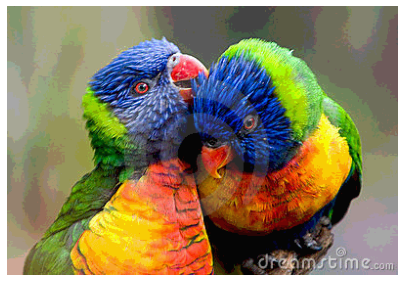

In [ ]:
model = KMeans(n_clusters=10, random_state=42)
y_pred = model.fit_predict(X)

n_clusters = range(10)
X_KMeans_10 = X
for cluster in n_clusters:
    elements_of_cluster = np.where(y_pred == cluster, X_KMeans_10.reshape(-1), np.nan)
    elements_of_cluster = elements_of_cluster[np.logical_not(np.isnan(elements_of_cluster))] #удалил наны
    X_KMeans_10 = np.where(y_pred == cluster, np.median(elements_of_cluster), X_KMeans_10.reshape(-1))

img_KMeans_10 = X_KMeans_10.reshape(275, 400, 3).astype('uint8')
print('SSIM = ', structural_similarity(img, img_KMeans_10, multichannel=True))
draw_picture(img_KMeans_10)

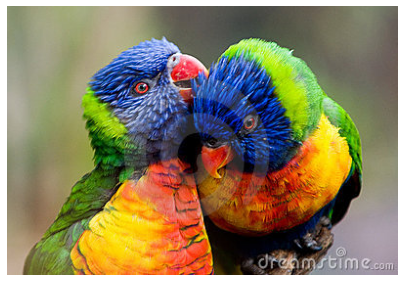

In [ ]:
draw_picture(img)

Для k = 10 в KMeans, получился неплохой результат, птицы почти 1 в 1 как на настоящем фото, однако фон получился не очень

SSIM =  0.9446227234398284


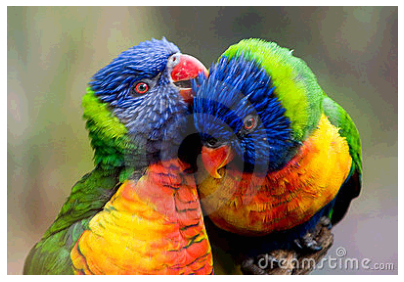

In [ ]:
model = KMeans(n_clusters=20, random_state=42)
y_pred = model.fit_predict(X)

n_clusters = range(20)
X_KMeans_20 = X
for cluster in n_clusters:
    elements_of_cluster = np.where(y_pred == cluster, X_KMeans_20.reshape(-1), np.nan)
    elements_of_cluster = elements_of_cluster[np.logical_not(np.isnan(elements_of_cluster))] #удалил наны
    X_KMeans_20 = np.where(y_pred == cluster, np.median(elements_of_cluster), X_KMeans_20.reshape(-1))

img_KMeans_20 = X_KMeans_20.reshape(275, 400, 3).astype('uint8')
print('SSIM = ', structural_similarity(img, img_KMeans_20, multichannel=True))
draw_picture(img_KMeans_20)

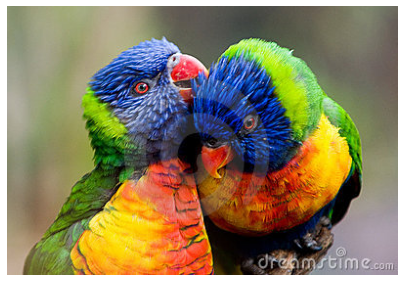

In [ ]:
draw_picture(img)

Получился достойный результат для k = 20 KMeans!

# Теперь будем работать с DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
values = []
for eps in np.arange(0.01, 0.26, 0.05):
    for min_samples in range(2, 5):
        model = DBSCAN(eps=eps, min_samples=min_samples)
        y_pred = model.fit_predict(X)

        n_clusters = range(max(y_pred))
        X_DBSCAN = X.reshape(-1)
        for cluster in n_clusters:
            elements_of_cluster = np.where(y_pred == cluster, X_DBSCAN, np.nan)
            elements_of_cluster = elements_of_cluster[np.logical_not(np.isnan(elements_of_cluster))] #удалил наны
            X_DBSCAN = np.where(y_pred == cluster, elements_of_cluster.mean(), X_DBSCAN)
        img_DBSCAN = X_DBSCAN.reshape(275, 400, 3).astype('uint8')

        score = structural_similarity(img, img_DBSCAN, multichannel=True)
        values.append((eps, min_samples, score))
        print(*(eps, min_samples, score))
max(values, key=lambda x: x[2])

0.01 2 1.0
0.01 3 1.0
0.01 4 1.0
0.060000000000000005 2 1.0
0.060000000000000005 3 1.0
0.060000000000000005 4 1.0
0.11 2 1.0
0.11 3 1.0
0.11 4 1.0
0.16000000000000003 2 1.0
0.16000000000000003 3 1.0
0.16000000000000003 4 1.0
0.21000000000000002 2 1.0
0.21000000000000002 3 1.0
0.21000000000000002 4 1.0


(0.01, 2, 1.0)

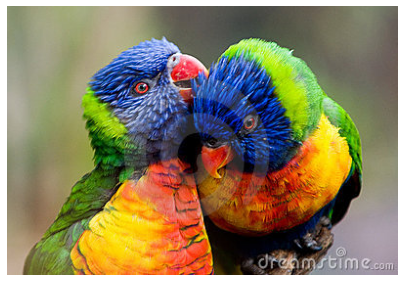

In [ ]:
draw_picture(img_DBSCAN)

In [ ]:
max(y_pred)

255

In [ ]:
np.unique(img_DBSCAN - img)

array([0], dtype=uint8)

Поскольку DBSCAN сам определяет количество кластеров при маленьких значениях гиперпараметров алгоритм находит все 256 кластеров из 256. Посмотрим что будет при бОльших значениях гиперпараметров


In [ ]:
values = []
for eps in np.arange(0.1, 3, 0.2):
    for min_samples in range(3, 22, 3):
        model = DBSCAN(eps=eps, min_samples=min_samples)
        y_pred = model.fit_predict(X)

        n_clusters = range(max(y_pred))
        X_DBSCAN = X.reshape(-1)
        for cluster in n_clusters:
            elements_of_cluster = np.where(y_pred == cluster, X_DBSCAN, np.nan)
            elements_of_cluster = elements_of_cluster[np.logical_not(np.isnan(elements_of_cluster))] #удалил наны
            X_DBSCAN = np.where(y_pred == cluster, elements_of_cluster.mean(), X_DBSCAN)
        img_DBSCAN = X_DBSCAN.reshape(275, 400, 3).astype('uint8')

        score = structural_similarity(img, img_DBSCAN, multichannel=True)
        values.append((eps, min_samples, score))
        print(*(eps, min_samples, score))
max(values, key=lambda x: x[2])

0.1 3 1.0
0.1 6 1.0
0.1 9 1.0
0.1 12 1.0
0.1 15 1.0
0.1 18 1.0
0.1 21 1.0
0.30000000000000004 3 1.0
0.30000000000000004 6 1.0
0.30000000000000004 9 1.0
0.30000000000000004 12 1.0
0.30000000000000004 15 1.0
0.30000000000000004 18 1.0
0.30000000000000004 21 1.0
0.5000000000000001 3 1.0
0.5000000000000001 6 1.0
0.5000000000000001 9 1.0
0.5000000000000001 12 1.0
0.5000000000000001 15 1.0
0.5000000000000001 18 1.0
0.5000000000000001 21 1.0
0.7000000000000001 3 1.0
0.7000000000000001 6 1.0
0.7000000000000001 9 1.0
0.7000000000000001 12 1.0
0.7000000000000001 15 1.0
0.7000000000000001 18 1.0
0.7000000000000001 21 1.0
0.9000000000000001 3 1.0
0.9000000000000001 6 1.0
0.9000000000000001 9 1.0
0.9000000000000001 12 1.0
0.9000000000000001 15 1.0
0.9000000000000001 18 1.0
0.9000000000000001 21 1.0


Вышло сообщение, что объем ОЗУ полностью исчерпан. Полученных результатов достаточно. Мы поняли, что DBSCAN выучивает все точки почти при любых гиперпараметрах, и поскольку количество кластеров алгоритм выбирает сам, он никак не помогает нам уменьшить число цветов в палитре. То есть для данной задачи этот алгоритм не подходит.

# Теперь воспользуемся Аггломеративной кластеризацией

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from skimage.transform import resize

In [ ]:
img_resized = resize(img, (34, 50))
X_resized = img_resized.reshape(-1, 1)

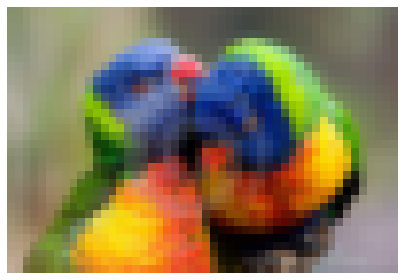

In [ ]:
draw_picture(img_resized)

SSIM =  0.6229140380369875


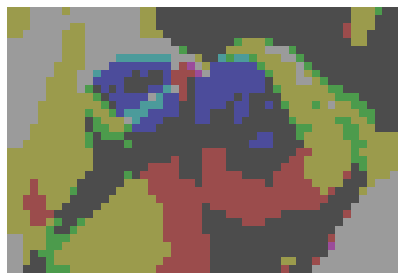

In [ ]:
model = AgglomerativeClustering(n_clusters=2)
y_pred = model.fit_predict(X_resized)

n_clusters = range(2)
X_Aggl_2 = X_resized
for cluster in n_clusters:
    elements_of_cluster = np.where(y_pred == cluster, X_Aggl_2.reshape(-1), np.nan)
    elements_of_cluster = elements_of_cluster[np.logical_not(np.isnan(elements_of_cluster))] #удалил наны
    X_Aggl_2 = np.where(y_pred == cluster, np.median(elements_of_cluster), X_Aggl_2.reshape(-1))

img_Aggl_2 = X_Aggl_2.reshape(34, 50, 3)
print('SSIM = ', structural_similarity(img_resized, img_Aggl_2, multichannel=True))
draw_picture(img_Aggl_2)

SSIM =  0.7830635239447603


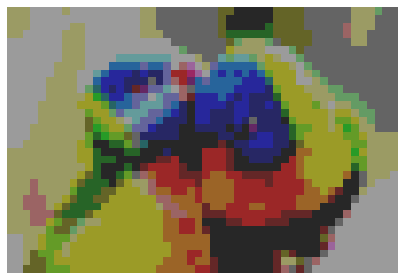

In [ ]:
model = AgglomerativeClustering(n_clusters=3)
y_pred = model.fit_predict(X_resized)

n_clusters = range(3)
X_Aggl_3 = X_resized
for cluster in n_clusters:
    elements_of_cluster = np.where(y_pred == cluster, X_Aggl_3.reshape(-1), np.nan)
    elements_of_cluster = elements_of_cluster[np.logical_not(np.isnan(elements_of_cluster))] #удалил наны
    X_Aggl_3 = np.where(y_pred == cluster, np.median(elements_of_cluster), X_Aggl_3.reshape(-1))

img_Aggl_3 = X_Aggl_3.reshape(34, 50, 3)
print('SSIM = ', structural_similarity(img_resized, img_Aggl_3, multichannel=True))
draw_picture(img_Aggl_3)

SSIM =  0.9665215269959546


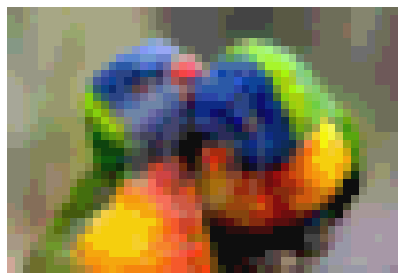

In [ ]:
model = AgglomerativeClustering(n_clusters=10)
y_pred = model.fit_predict(X_resized)

n_clusters = range(10)
X_Aggl_10 = X_resized
for cluster in n_clusters:
    elements_of_cluster = np.where(y_pred == cluster, X_Aggl_10.reshape(-1), np.nan)
    elements_of_cluster = elements_of_cluster[np.logical_not(np.isnan(elements_of_cluster))] #удалил наны
    X_Aggl_10 = np.where(y_pred == cluster, np.median(elements_of_cluster), X_Aggl_10.reshape(-1))

img_Aggl_10 = X_Aggl_10.reshape(34, 50, 3)
print('SSIM = ', structural_similarity(img_resized, img_Aggl_10, multichannel=True))
draw_picture(img_Aggl_10)

SSIM =  0.9904624477793892


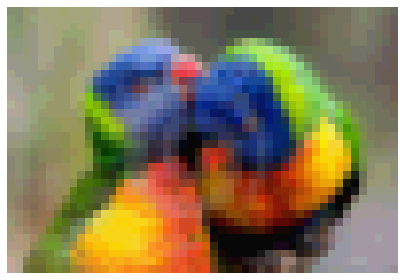

In [ ]:
model = AgglomerativeClustering(n_clusters=20)
y_pred = model.fit_predict(X_resized)

n_clusters = range(20)
X_Aggl_20 = X_resized
for cluster in n_clusters:
    elements_of_cluster = np.where(y_pred == cluster, X_Aggl_20.reshape(-1), np.nan)
    elements_of_cluster = elements_of_cluster[np.logical_not(np.isnan(elements_of_cluster))] #удалил наны
    X_Aggl_20 = np.where(y_pred == cluster, np.median(elements_of_cluster), X_Aggl_20.reshape(-1))

img_Aggl_20 = X_Aggl_20.reshape(34, 50, 3)
print('SSIM = ', structural_similarity(img_resized, img_Aggl_20, multichannel=True))
draw_picture(img_Aggl_20)

Вывод по заданию: лучше всего справляется алгоритм KMeans. Поскольку задача стоит уменьшить палитру цветов, алгоритм DBSCAN c ней не справился. Алгоритм аггломеративной кластеризации с задачей справился, однако он требователен к ресурсам, поэтому уступает KMeans 

Результат работы KMeans на моих картинках:

In [ ]:
im1 = cv2.imread('/content/drive/MyDrive/homeworks/картинки/1.jpg')
im2 = cv2.imread('/content/drive/MyDrive/homeworks/картинки/2.jpg')
im3 = cv2.imread('/content/drive/MyDrive/homeworks/картинки/3.jpg')
im4 = cv2.imread('/content/drive/MyDrive/homeworks/картинки/4.jpg')

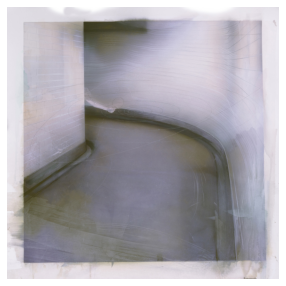

In [ ]:
draw_picture(im1)

In [ ]:
im1.shape

(2160, 2160, 3)

In [ ]:
model = KMeans(n_clusters=30, random_state=42)
X = im1.reshape(-1)
y_pred = model.fit_predict(X.reshape(-1, 1))
n_clusters = range(30)
X_1 = X
for cluster in n_clusters:
    elements_of_cluster = np.where(y_pred == cluster, X_1, np.nan)
    elements_of_cluster = elements_of_cluster[np.logical_not(np.isnan(elements_of_cluster))] #удалил наны
    X_1 = np.where(y_pred == cluster, np.median(elements_of_cluster), X_1)
im1_KMeans = X_1.reshape(2160, 2160, 3).astype('uint8')

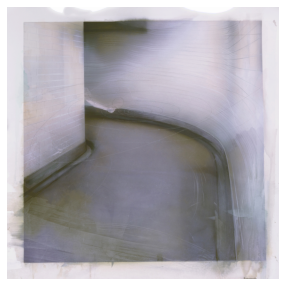

In [ ]:
draw_picture(im1_KMeans)

In [ ]:
structural_similarity(im1, im1_KMeans, multichannel=True)

0.9655264085770892

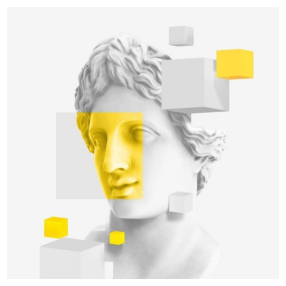

In [ ]:
draw_picture(im3)

In [ ]:
model = KMeans(n_clusters=25, random_state=42)
X = im3.reshape(-1)
y_pred = model.fit_predict(X.reshape(-1, 1))
n_clusters = range(25)
X_3 = X
for cluster in n_clusters:
    elements_of_cluster = np.where(y_pred == cluster, X_3, np.nan)
    elements_of_cluster = elements_of_cluster[np.logical_not(np.isnan(elements_of_cluster))] #удалил наны
    X_3 = np.where(y_pred == cluster, np.median(elements_of_cluster), X_3)
im3_KMeans = X_3.reshape(640, 640, 3).astype('uint8')

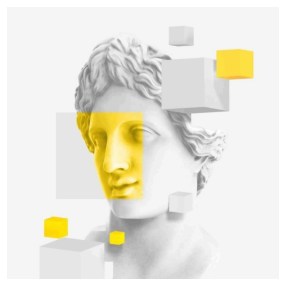

In [ ]:
draw_picture(im3_KMeans)

In [ ]:
structural_similarity(im3, im3_KMeans, multichannel=True)

0.9872691633721193

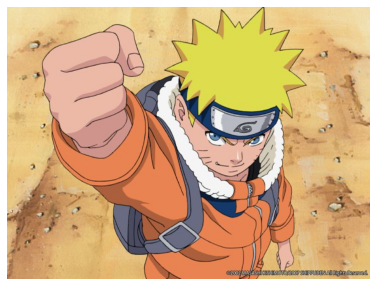

In [ ]:
draw_picture(im4)

In [ ]:
im4.shape

(540, 720, 3)

In [ ]:
model = KMeans(n_clusters=20, random_state=42)
X = im4.reshape(-1)
y_pred = model.fit_predict(X.reshape(-1, 1))
n_clusters = range(20)
X_4 = X
for cluster in n_clusters:
    elements_of_cluster = np.where(y_pred == cluster, X_4, np.nan)
    elements_of_cluster = elements_of_cluster[np.logical_not(np.isnan(elements_of_cluster))] #удалил наны
    X_4 = np.where(y_pred == cluster, np.median(elements_of_cluster), X_4)
im4_KMeans = X_4.reshape(540, 720, 3).astype('uint8')

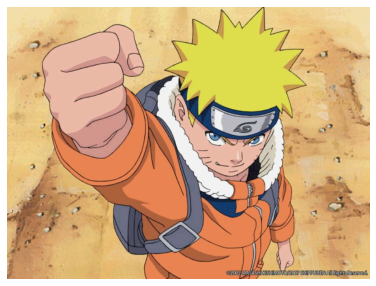

In [ ]:
draw_picture(im4_KMeans)

In [ ]:
structural_similarity(im4, im4_KMeans, multichannel=True)

0.95231982244177

Достойный результат на всех картинках!

# 2 - Уменьшение размерности помогает классификации лиц (суммарно 6 баллов)

Используя методы уменьшения размерности признаков, решите с максимальным **accuracy** задачу классификации лиц знаменитостей (датасет старый, неудивительно, если вы из всех знаменитостей будете знать только Буша и Шварценнегера).

Попробуйте добиться максимального accuracy (2 балла)
* без уменьшения размерности
* с уменьшением размерности

Возможно без уменьшения размерности у вас даже просто не получится дождаться времени работы на 11750 признаках. Я слышал у кого-то получилось, у меня нет.

Сравните ваш результат с константным предсказанием "всегда самый популярный класс". Делает ли ваша модель какой-то значительный прогресс? (1 балл)

Нарисуйте несколько лиц, на которых ваш алгоритм ошибся, подпишите правильный ответ и ваш ответ. (1 балл)

Напишите, каким алгоритмом вы воспользовались (PCA или TSNE), почему не другим? Обоснуйте ответ. (1 балл)

Визуализируйте датасет на плоскости. Подпишите несколько самых больших классов именами людей. Чем вы воспользуетесь, PCA или TSNE? Обоснуйте ответ (1 балл)

Скачивание данных и вспомогательная функция визуализации лиц уже есть:

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=30, resize=1.0)
# эту строчку менять нельзя, ресайзить нельзя

In [ ]:
from sklearn.model_selection import train_test_split
X = lfw_people.data
y = lfw_people.target
names = lfw_people.target_names

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=42)
# эту строчку тоже менять нельзя'

In [ ]:
X.shape # 2370 лиц, каждый из них представляется вектором размера 11750

(2370, 11750)

In [ ]:
y.shape

(2370,)

In [ ]:
names[8] # в y лежат номера, а names переводит номер в имя

'George W Bush'

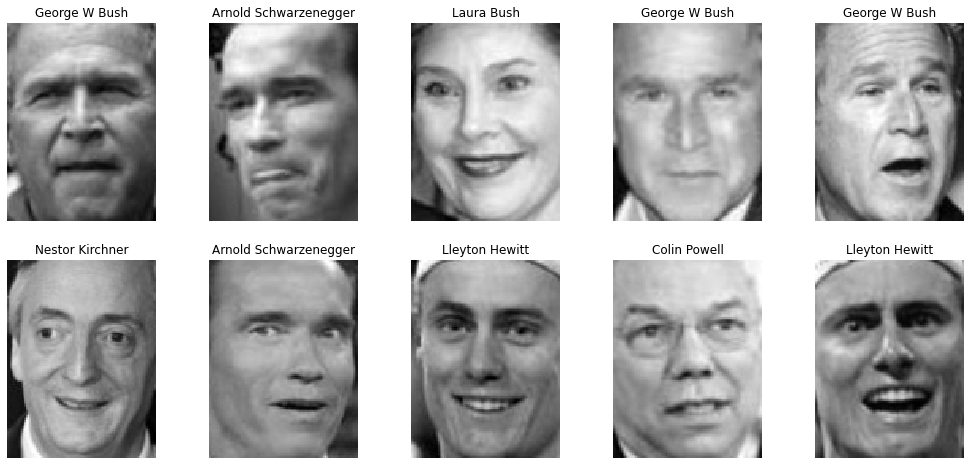

In [ ]:
import matplotlib.pyplot as plt
def plot_image(image_id):
    # функция рисует изображение номер image_id
    plt.title(names[y[image_id]])
    plt.imshow(255 - lfw_people['images'][image_id], cmap=plt.cm.gray_r, interpolation='nearest')
    
def plot_grid(image_ids, nrows, ncols):
    # функция рисует изображения с id равными image_ids
    # в nrows рядов и ncols столбцов
    fig = plt.gcf()
    fig.set_size_inches(17.5, 8)
    for index, example_id in enumerate(image_ids):
        plt.subplot(nrows, ncols, index + 1)
        plot_image(example_id)
        plt.axis('off')

plot_grid(range(10), nrows=2, ncols=5)# первые 10 лиц

In [ ]:
from collections import Counter
import numpy as np

In [ ]:
X

array([[112.       , 111.333336 , 108.333336 , ...,  19.       ,
          7.6666665,   2.       ],
       [  4.3333335,   4.3333335,   6.6666665, ...,  64.       ,
         64.       ,  65.333336 ],
       [ 35.666668 ,  39.       ,  49.666668 , ..., 185.66667  ,
        186.       , 186.       ],
       ...,
       [ 90.666664 ,  91.       ,  82.666664 , ...,  92.333336 ,
         82.       ,  82.333336 ],
       [ 16.666666 ,  13.666667 ,  10.666667 , ...,  61.       ,
         60.333332 ,  60.333332 ],
       [105.333336 ,  94.666664 ,  86.       , ..., 246.66667  ,
        206.66667  , 140.66667  ]], dtype=float32)

In [ ]:
value_counts = Counter(y)
value_counts

Counter({0: 39,
         1: 35,
         2: 36,
         3: 77,
         4: 42,
         5: 236,
         6: 31,
         7: 121,
         8: 530,
         9: 109,
         10: 44,
         11: 30,
         12: 39,
         13: 71,
         14: 52,
         15: 55,
         16: 42,
         17: 53,
         18: 31,
         19: 60,
         20: 32,
         21: 41,
         22: 41,
         23: 48,
         24: 33,
         25: 37,
         26: 30,
         27: 32,
         28: 52,
         29: 33,
         30: 33,
         31: 144,
         32: 32,
         33: 49})

In [ ]:
the_most_frequent = max(value_counts, key=lambda x: value_counts[x])
the_most_frequent 

8

In [ ]:
y_pred_const = np.zeros(y.shape[0]) + the_most_frequent 
y_pred_const.shape

(2370,)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import f_classif, SelectKBest, SequentialFeatureSelector
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Без уменьшения размерности

Accuracy логрега на тестовой выборке без уменьшения размерности

In [ ]:
model_log_reg = LogisticRegression(random_state=42)
model_log_reg.fit(X_train, y_train)
y_pred_log_reg = model_log_reg.predict(X_test)
accuracy_score(y_pred_log_reg, y_test)

0.6729957805907173

Accuracy логрега на кросс-валидации без уменьшения размерности

In [ ]:
np.mean(cross_val_score(model_log_reg, X, y, cv=5, scoring='accuracy'))

0.6780590717299578

Accuracy most frequent baseline'a

In [ ]:
accuracy_score(y_pred_const, y)

0.22362869198312235

Accuracy knn'a на тестовой выборке без уменьшения размерности

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_score(y_pred_knn, y_test)

0.4240506329113924

Accuracy knn'a на кросс-валидации без уменьшения размерности

In [ ]:
np.mean(cross_val_score(knn, X, y, cv=5, scoring='accuracy'))

0.3978902953586497

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

Accuracy дерева решений на тестовой выборке без уменьшения размерности

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)
clf.score(X_test, y_test)

0.310126582278481

Accuracy дерева решений на кросс-валидации без уменьшения размерности

In [ ]:
np.mean(cross_val_score(clf, X, y, cv=5))

0.2616033755274262

Accuracy случайного леса на тестовой выборке без уменьшения размерности

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_score(y_pred_rf, y_test)

0.4767932489451477

Accuracy случайного леса на кросс-валидации без уменьшения размерности

In [ ]:
np.mean(cross_val_score(rf, X, y, cv=5))

0.46919831223628694

Accuracy Метода Опорных Векторов на тестовой выборке без уменьшения размерности

In [ ]:
from sklearn.svm import LinearSVC
clfier = LinearSVC()
clfier.fit(X_train, y_train)
y_pred_svm = clfier.predict(X_test)
accuracy_score(y_pred_svm, y_test)

0.6624472573839663

Accuracy Метода Опорных Векторов на кросс-валидации без уменьшения размерности

In [ ]:
np.mean(cross_val_score(clfier, X, y, cv=5, scoring='accuracy'))

0.6683544303797468

Посчитаем то же самое, только предварительно нормализовав данные:

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
X_normalized = StandardScaler().fit_transform(X)

In [ ]:
np.mean(cross_val_score(model_log_reg, X_normalized, y, cv=5, scoring='accuracy'))

0.7202531645569621

In [ ]:
np.mean(cross_val_score(knn, X_normalized, y, cv=5, scoring='accuracy'))

0.40506329113924056

In [ ]:
np.mean(cross_val_score(clf, X_normalized, y, cv=5, scoring='accuracy'))

0.2616033755274262

In [ ]:
np.mean(cross_val_score(rf, X_normalized, y, cv=5))

0.470464135021097

In [ ]:
X_normalized_1 = MinMaxScaler().fit_transform(X)

In [ ]:
np.mean(cross_val_score(model_log_reg, X_normalized_1, y, cv=5, scoring='accuracy'))

0.6890295358649788

In [ ]:
np.mean(cross_val_score(knn, X_normalized_1, y, cv=5, scoring='accuracy'))

0.40675105485232066

In [ ]:
np.mean(cross_val_score(clf, X_normalized_1, y, cv=5, scoring='accuracy'))

0.26118143459915616

In [ ]:
np.mean(cross_val_score(rf, X_normalized_1, y, cv=5))

0.46962025316455697

Нормализация помогла улучшить результат, отлично!
Теперь попробуем улучшить результат перебрав гиперпараметры наших моделей:

In [ ]:
model = LogisticRegression(class_weight=Counter(y), random_state=42)
np.mean(cross_val_score(model, X_normalized, y, cv=5, scoring='accuracy'))

0.709282700421941

Изменение гиперпараметра class_weight нам не помогло, поэтому не будем его трогать 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_normalized, y,
                                                    test_size=0.2, random_state=42)

Воспользуюсь поиском по сетке:

In [ ]:
parametrs = {'penalty': ['l1', 'l2'],
             'C': np.arange(0.1, 3, 0.2),
             'random_state': [42]}
grid = GridSearchCV(LogisticRegression(), parametrs, cv=5)
grid.fit(X_train_1, y_train_1)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5,
       2.7, 2.9]),
                         'penalty': ['l1', 'l2'], 'random_state': [42]})

In [ ]:
grid.best_params_

{'C': 2.900000000000001, 'penalty': 'l2', 'random_state': 42}

In [ ]:
grid.best_score_

0.7120261074850717

In [ ]:
np.mean(cross_val_score(LogisticRegression(C=2.9, random_state=42), X_normalized, y, cv=5, scoring='accuracy'))

0.7168776371308017

In [ ]:
np.mean(cross_val_score(LogisticRegression(C=1, random_state=42), X_normalized, y, cv=5, scoring='accuracy'))

0.7202531645569621

Так, результат на кросс-валидации получился хуже, чем при C=1, поэтому сделаю все вручную:

In [ ]:
C_values = np.arange(0.5, 5, 0.7)
results = []
for C in C_values:
    model = LogisticRegression(C=C, random_state=42)
    cv_score = np.mean(cross_val_score(model, X_normalized, y, cv=5, scoring='accuracy'))
    results.append((C, cv_score))
print('best C = {}, cv_score = {}'.format(*max(results, key=lambda x: x[1])))

TypeError: ignored

In [ ]:
print('best C = {}, cv_score = {}'.format(*max(results, key=lambda x: x[1])))

best C = 1.2, cv_score = 0.7185654008438819


In [ ]:
results

[(0.5, 0.7177215189873417),
 (1.2, 0.7185654008438819),
 (1.9, 0.7164556962025316),
 (2.5999999999999996, 0.7181434599156118),
 (3.3, 0.7164556962025317),
 (4.0, 0.7168776371308017),
 (4.699999999999999, 0.7130801687763714)]

In [ ]:
parametrs = {'penalty': ['l2'],
             'C': np.arange(0.8, 1.2, 0.1),
             'random_state': [42]}
grid = GridSearchCV(LogisticRegression(), parametrs, cv=5)
grid.fit(X_normalized, y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([0.8, 0.9, 1. , 1.1]), 'penalty': ['l2'],
                         'random_state': [42]})

In [ ]:
grid.best_score_

0.7202531645569621

In [ ]:
grid.best_params_

{'C': 1.0, 'penalty': 'l2', 'random_state': 42}

Так, я нашел у себя ошибку, вместо X_train_1, y_train_1 в GridSearch мне нужно было передавать X_normalized, поэтому результаты отличались. Теперь я понял, как работать с гридсерчем!

Хорошо, коэффициент регуляризации мы трогать не будем, дефолтное значение нас устраивает. Лучший результат у логистической регрессии на кросс-валидации accuracy = 0.72 без уменьшения размерности

In [ ]:
C_values = np.arange(0.5, 5, 0.7)
results = []
for C in C_values:
    model = LogisticRegression(C=C, random_state=42)
    cv_score = np.mean(cross_val_score(model, X_normalized, y, cv=5, scoring='accuracy'))
    results.append((C, cv_score))
print('best C = {}, cv_score = {}'.format(*max(results, key=lambda x: x[1])))

KNN

In [ ]:
np.mean(cross_val_score(KNeighborsClassifier(), X_normalized, y, cv=5, scoring='accuracy'))

0.40506329113924056

In [ ]:
parametrs = {'n_neighbors': range(2, 20),
              'weights':['uniform', 'distance'],
             'leaf_size': range(15, 45),
            }
grid = GridSearchCV(KNeighborsClassifier(), parametrs, cv=5, scoring='accuracy')
grid.fit(X_normalized, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': range(15, 45),
                         'n_neighbors': range(2, 20),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
grid.best_score_

0.4468354430379747

In [ ]:
grid.best_params_

{'leaf_size': 15, 'n_neighbors': 11, 'weights': 'distance'}

Результат на KNN стал лучше, но не сильно

Вывод: значимого результата добиться без уменьшения размерности не удалось, потому что лучшими гиперпараметрами для лог рега оказались дефолтные. По метрике accuracy на кросс-валидации лучшие результаты у лог рега (0.72) и LinearSVC (0.66), однако  LinearSVC работает намного дольше по сравнению с логистической регрессией

# С уменьшением размерности

In [ ]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline

# SVD

In [ ]:
pipeline = Pipeline([
                     ('transform', TruncatedSVD(n_components=1000, random_state=42)),
                     ('classifier', LogisticRegression(random_state=42))
])

In [ ]:
np.mean(cross_val_score(pipeline, X, y, cv=5, scoring='accuracy'))

0.6835443037974682

In [ ]:
results = []
for n_components in range(5, 500, 50):
    pipeline = Pipeline([
                     ('transform', TruncatedSVD(n_components=n_components, random_state=42)),
                     ('classifier', LogisticRegression(random_state=42))
])  
    cv_score = np.mean(cross_val_score(pipeline, X, y, cv=5, scoring='accuracy'))
    results.append(cv_score)

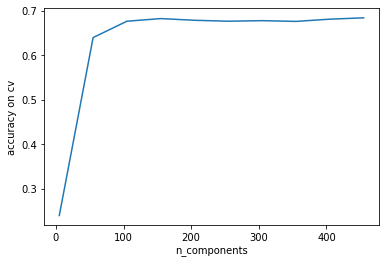

In [ ]:
plt.plot(range(5, 500, 50), results)
plt.xlabel('n_components')
plt.ylabel('accuracy on cv')
plt.show()

In [ ]:
results = []
for n_components in range(5, 500, 50):
    pipeline = Pipeline([
                     ('transform', TruncatedSVD(n_components=n_components, random_state=42)),
                     ('classifier', LogisticRegression(random_state=42))
])  
    cv_score = np.mean(cross_val_score(pipeline, X_normalized, y, cv=5, scoring='accuracy'))
    results.append(cv_score)

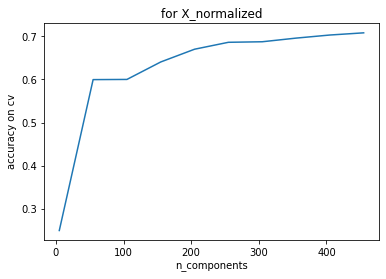

In [ ]:
plt.plot(range(5, 500, 50), results)
plt.title('for X_normalized')
plt.xlabel('n_components')
plt.ylabel('accuracy on cv')
plt.show()

In [ ]:
results = []
for n_components in range(5, 3000, 150):
    pipeline = Pipeline([
                     ('transform', TruncatedSVD(n_components=n_components, random_state=42)),
                     ('classifier', LogisticRegression(random_state=42))
])  
    cv_score = np.mean(cross_val_score(pipeline, X_normalized, y, cv=5, scoring='accuracy'))
    results.append(cv_score)
print(max(results))

0.719409282700422


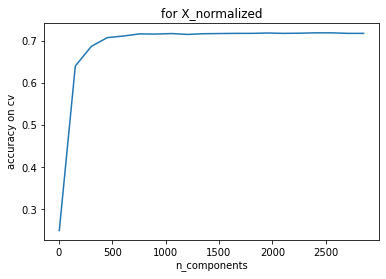

In [ ]:
plt.plot(range(5, 3000, 150), results)
plt.title('for X_normalized')
plt.xlabel('n_components')
plt.ylabel('accuracy on cv')
plt.show()

In [ ]:
results = []
for n_components in range(5, 1000, 50):
    pipeline = Pipeline([
                     ('transform', TruncatedSVD(n_components=n_components, random_state=42)),
                     ('classifier', LogisticRegression(random_state=42))
])  
    cv_score = np.mean(cross_val_score(pipeline, X_normalized, y, cv=5, scoring='accuracy'))
    results.append(cv_score)

In [ ]:
print(list(zip(range(5, 1000, 50), results)))

[(5, 0.249789029535865), (55, 0.59957805907173), (105, 0.6), (155, 0.640506329113924), (205, 0.670042194092827), (255, 0.6860759493670886), (305, 0.6873417721518988), (355, 0.6957805907172997), (405, 0.7029535864978903), (455, 0.7080168776371307), (505, 0.7067510548523207), (555, 0.709704641350211), (605, 0.7118143459915612), (655, 0.7130801687763714), (705, 0.7139240506329114), (755, 0.7168776371308017), (805, 0.7139240506329114), (855, 0.7156118143459916), (905, 0.7164556962025317), (955, 0.7185654008438819)]


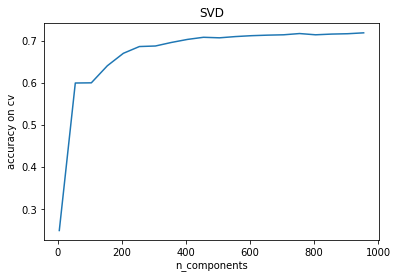

In [ ]:
plt.plot(range(5, 1000, 50), results)
plt.title('SVD')
plt.xlabel('n_components')
plt.ylabel('accuracy on cv')
plt.show()

SVD помог уменьшить количество признаков (конкретно на нашем примере мы можем оставить около 1000 признаков, и почти не потерять в качестве), однако улучшить результат он нам не помог (accuracy на cv 0.719 с помощью SVD против 0.72 без уменьшения размерности)

# PCA

In [ ]:
results = []
for n_components in (2, 50, 200, 1000, 3000):
    pipeline = Pipeline([
                     ('transform', PCA(n_components=n_components, random_state=42)),
                     ('classifier', LogisticRegression(random_state=42))
                     ])  
    cv_score = np.mean(cross_val_score(pipeline, X_normalized, y, cv=5, scoring='accuracy'))
    results.append((n_components, cv_score))
results

[(2, 0.23122362869198315),
 (50, 0.5945147679324895),
 (200, 0.6654008438818565),
 (1000, 0.7151898734177216),
 (3000, nan)]

In [ ]:
results = []
for n_components in (3000, 3500, 4000):
    pipeline = Pipeline([
                     ('transform', PCA(n_components=n_components, random_state=42)),
                     ('classifier', LogisticRegression(random_state=42))
                     ])  
    cv_score = np.mean(cross_val_score(pipeline, X_normalized, y, cv=5, scoring='accuracy'))
    results.append((n_components, cv_score))
results

[(3000, nan), (3500, nan), (4000, nan)]

In [ ]:
results = []
for n_components in range(200, 3000, 200):
    pipeline = Pipeline([
                     ('transform', PCA(n_components=n_components, random_state=42)),
                     ('classifier', LogisticRegression(random_state=42))
                     ])  
    cv_score = np.mean(cross_val_score(pipeline, X_normalized, y, cv=5, scoring='accuracy'))
    results.append((n_components, cv_score))
results

[(200, 0.6654008438818565),
 (400, 0.7012658227848101),
 (600, 0.709282700421941),
 (800, 0.7156118143459915),
 (1000, 0.7151898734177216),
 (1200, 0.719831223628692),
 (1400, 0.7181434599156118),
 (1600, 0.7181434599156118),
 (1800, 0.7189873417721518),
 (2000, nan),
 (2200, nan),
 (2400, nan),
 (2600, nan),
 (2800, nan)]

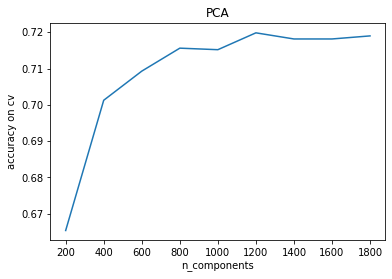

In [ ]:
plt.plot(range(200, 1801, 200), [tuple_components_vs_score[1] for tuple_components_vs_score in results][:9])
plt.title('PCA')
plt.xlabel('n_components')
plt.ylabel('accuracy on cv')
plt.show()

Результат PCA получился схожим на SVD, количество признаков уменьшилось примерно в 10 раз без потери качества, но результат не стал лучше. Результат: 1200 признаков, accuracy on cv = 0.719

Для решения данной задачи нельзя пользоваться алгоритмом TSNE, поскольку он недетерменированный. Произойдет либо утечка данных из теста в трейн, либо из-за недетерменированности мы просто не сможем провалидироваться на тесте.

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
svc = LinearSVC(random_state=42)

In [ ]:
pipeline = Pipeline([
                     ('transform', PCA(n_components=100, random_state=42)),
                     ('classifier', svc)
                     ])  
np.mean(cross_val_score(pipeline, X_normalized, y, cv=5, scoring='accuracy'))

0.5759493670886077

In [ ]:
results = []
for n_components in range(100, 1000, 100):
    pipeline = Pipeline([
                     ('transform', PCA(n_components=n_components, random_state=42)),
                     ('classifier', svc)
                     ])  
    cv_score = np.mean(cross_val_score(pipeline, X_normalized, y, cv=5, scoring='accuracy'))
    results.append((n_components, cv_score))
results

[(100, 0.5641350210970464),
 (200, 0.6004219409282701),
 (300, 0.5721518987341773),
 (400, 0.5518987341772151),
 (500, 0.559071729957806),
 (600, 0.5544303797468355),
 (700, 0.549367088607595),
 (800, 0.5510548523206751),
 (900, 0.5518987341772152)]

По даннным результатам SVM уступает логрегу (если брать n_components до 1000). То есть лучшей моделью до сих пор остается логистическая регрессия

Вывод по уменьшению размерности:

В итоге мне нужно выбрать между PCA, TSNE, SVD. У PCA и SVD получились похожие результаты, но все же я выберу PCA, потому что он работает немного быстрее чем SVD, а TSNE, как говорилось выше, для данной задачи вообще не подходит

# Эксперименты с ансамблями

In [ ]:
from sklearn.ensemble import StackingClassifier, BaggingClassifier

In [ ]:
ensemble = StackingClassifier([('logreg', model_log_reg), ('svc', svc), ('knn', knn), ('rf', rf)])

In [ ]:
pipeline = Pipeline([
                     ('transform', PCA(n_components=500, random_state=42)),
                     ('classifier', ensemble)
                     ])  
np.mean(cross_val_score(pipeline, X_normalized, y, cv=5, scoring='accuracy'))

0.7042194092827004

In [ ]:
ensemble = StackingClassifier([('logreg', model_log_reg), ('svc', svc)])
pipeline = Pipeline([
                     ('transform', PCA(n_components=1000, random_state=42)),
                     ('classifier', ensemble)
                     ])  
np.mean(cross_val_score(pipeline, X_normalized, y, cv=5, scoring='accuracy'))

0.7033755274261604

Стекинг моделей не помог улучшить результат

In [ ]:
ensemble = BaggingClassifier(LogisticRegression(), random_state=42)
pipeline = Pipeline([
                     ('transform', PCA(n_components=1000, random_state=42)),
                     ('classifier', ensemble)
                     ])
np.mean(cross_val_score(pipeline, X_normalized, y, cv=5, scoring='accuracy'))

0.7244725738396625

Получилось очень немного улучшить результат. Хорошо, поперебираем гиперпараметры:

In [ ]:
ensemble = BaggingClassifier(LogisticRegression(), random_state=42,  n_estimators=15, max_features=int(np.sqrt(1000)))
pipeline = Pipeline([
                     ('transform', PCA(n_components=1000, random_state=42)),
                     ('classifier', ensemble)
                     ])
np.mean(cross_val_score(pipeline, X_normalized, y, cv=5, scoring='accuracy'))

0.22531645569620254

In [ ]:
ensemble = BaggingClassifier(LogisticRegression(), random_state=42)
n_estimators = np.arange(5, 100, 10)
param_grid = [{'classifier__n_estimators': n_estimators }]
grid = GridSearchCV(pipeline, cv=5, param_grid=param_grid,  scoring='accuracy')
grid.fit(X_normalized, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transform',
                                        PCA(n_components=1000,
                                            random_state=42)),
                                       ('classifier',
                                        BaggingClassifier(base_estimator=LogisticRegression(),
                                                          max_features=333,
                                                          n_estimators=20,
                                                          random_state=42))]),
             param_grid=[{'classifier__n_estimators': array([ 5, 15, 25, 35, 45, 55, 65, 75, 85, 95])}],
             scoring='accuracy')

In [ ]:
grid.best_score_

0.6084388185654008

In [ ]:
grid.best_params_

{'classifier__n_estimators': 95}

Тут я немного перепутал, забыл переопределить pipeline, поэтому GridSearch проработал 2 часа с гиперпараметром max_features=333, хотя я не хотел менять его. Все равно мы получили информацию, что бэггинг работает лучше при большом количестве оценщиков. Применим эту информацию:


In [ ]:
ensemble = BaggingClassifier(LogisticRegression(), n_estimators = 95, random_state=42)
pipeline = Pipeline([
                     ('transform', PCA(n_components=1000, random_state=42)),
                     ('classifier', ensemble)
                     ])
np.mean(cross_val_score(pipeline, X_normalized, y, cv=5, scoring='accuracy'))

0.7324894514767932

Хорошо, мне удалось немного улучшить результат. Итоговая модель:


In [ ]:
ensemble = BaggingClassifier(LogisticRegression(), n_estimators = 95, random_state=42)
pipeline = Pipeline([
                     ('transform', PCA(n_components=1000, random_state=42)),
                     ('classifier', ensemble)
                     ])
pipeline.fit(X_train_1, y_train_1)
y_pred = pipeline.predict(X_test_1)
print('accuracy on test sample =', accuracy_score(y_pred, y_test_1))

accuracy on test sample = 0.7489451476793249


In [ ]:
print('accuracy on baseline const pred =', accuracy_score(y_pred_const, y))

accuracy on baseline const pred = 0.22362869198312235


Accuracy модели, предсказывающей самый популярный класс низкая = 0.223, accuracy моей модели на тестовой выборке = 0.748, на кросс-валидации = 0.732.
То есть бейслановая модель неэффективна

# Ошибки модели

In [ ]:
indices = np.arange(y_pred.shape[0])
missed_indices = np.where(y_pred != y_test_1, indices, np.nan)
missed_indices = missed_indices[np.logical_not(np.isnan(missed_indices))]
missed_indices

array([  0.,   6.,   7.,   9.,  13.,  15.,  17.,  19.,  25.,  39.,  41.,
        50.,  52.,  62.,  65.,  67.,  69.,  72.,  75.,  78.,  98., 104.,
       106., 107., 109., 110., 111., 117., 123., 124., 135., 137., 140.,
       141., 143., 147., 148., 154., 158., 160., 167., 172., 176., 183.,
       188., 189., 191., 196., 204., 207., 208., 211., 219., 220., 225.,
       229., 233., 242., 243., 245., 248., 253., 256., 267., 271., 273.,
       277., 288., 298., 302., 303., 317., 318., 320., 328., 329., 341.,
       345., 348., 352., 359., 360., 362., 365., 372., 373., 380., 382.,
       383., 385., 391., 395., 396., 397., 398., 399., 400., 403., 405.,
       408., 410., 413., 414., 428., 429., 430., 433., 434., 442., 449.,
       452., 456., 460., 467., 468., 469., 471., 472., 473.])

In [ ]:
wrong_predicted_names = np.where(y_pred != y_test_1, names[y_pred], np.nan)

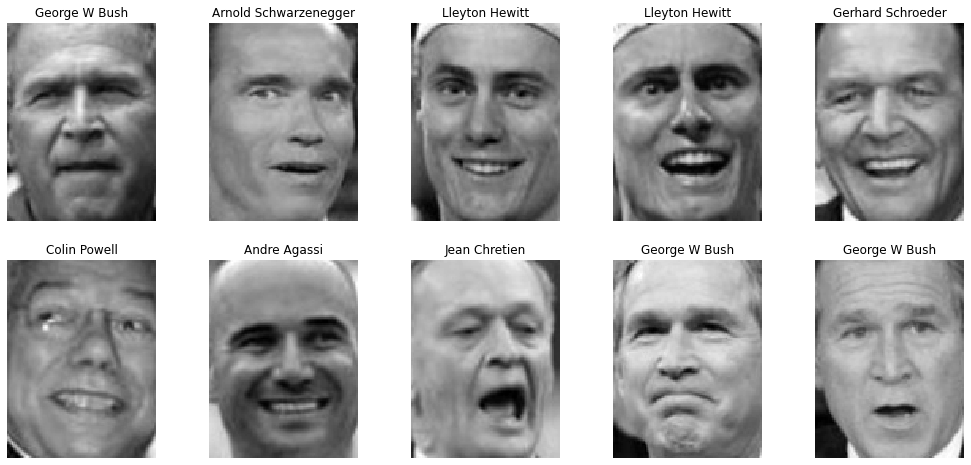

In [ ]:
plot_grid(missed_indices[:10].astype('int'), nrows=2, ncols=5)

In [ ]:
def plot_predicted_image(image_id):
    plt.title(wrong_predicted_names[image_id])
    plt.imshow(255 - lfw_people['images'][image_id], cmap=plt.cm.gray_r, interpolation='nearest')
    
def plot_predicted_grid(image_ids, nrows, ncols):
    fig = plt.gcf()
    fig.set_size_inches(17.5, 8)
    for index, example_id in enumerate(image_ids):
        plt.subplot(nrows, ncols, index + 1)
        plot_predicted_image(example_id)
        plt.axis('off')

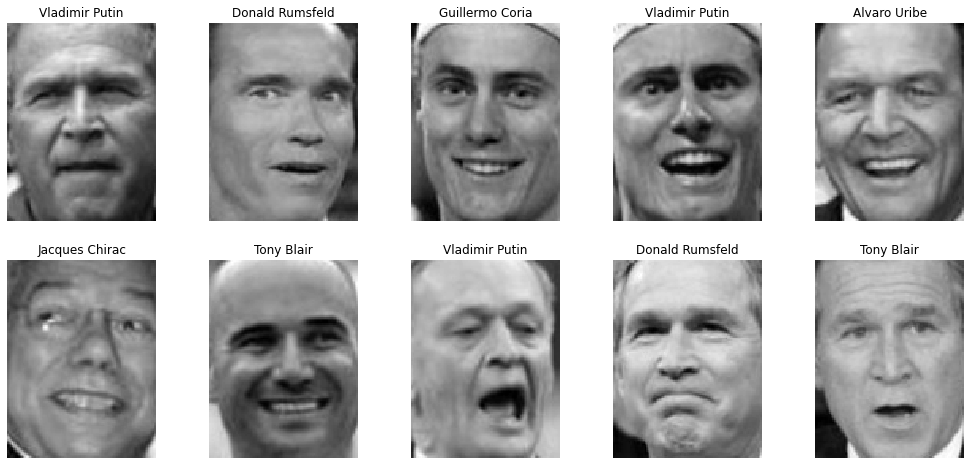

In [ ]:
plot_predicted_grid(missed_indices[:10].astype('int'), nrows=2, ncols=5)

In [ ]:
names[y_pred[np.where(y_pred != y_test_1, True, False)][:10]]

array(['Vladimir Putin', 'Donald Rumsfeld', 'Guillermo Coria',
       'Vladimir Putin', 'Alvaro Uribe', 'Jacques Chirac', 'Tony Blair',
       'Vladimir Putin', 'Donald Rumsfeld', 'Tony Blair'], dtype='<U25')

In [ ]:
import pandas as pd
pd.Series(names[y_pred[np.where(y_pred != y_test_1, True, False)]]).value_counts()

George W Bush              26
Vladimir Putin             12
Colin Powell               10
Donald Rumsfeld             9
Gerhard Schroeder           6
Tony Blair                  5
Jennifer Capriati           4
Arnold Schwarzenegger       4
David Beckham               4
Jacques Chirac              3
Jean Chretien               3
Junichiro Koizumi           3
Hans Blix                   3
Serena Williams             3
Guillermo Coria             3
John Ashcroft               2
Alvaro Uribe                2
Ariel Sharon                2
Silvio Berlusconi           2
Lleyton Hewitt              2
Vicente Fox                 2
Gloria Macapagal Arroyo     2
John Negroponte             2
Hugo Chavez                 2
Andre Agassi                1
Kofi Annan                  1
Recep Tayyip Erdogan        1
dtype: int64

Моей модели очень запомнился Владимир Владимирович Путин! Возможно, он часто делал пластические операции. Поэтому она часто ошибалась на нем. Еще чаще модель ошибалась на Джордже Буше

# Визуализация датасета на плоскости:

In [ ]:
tsne = TSNE(n_components=2)
X_tsne_2 = tsne.fit_transform(X_normalized)

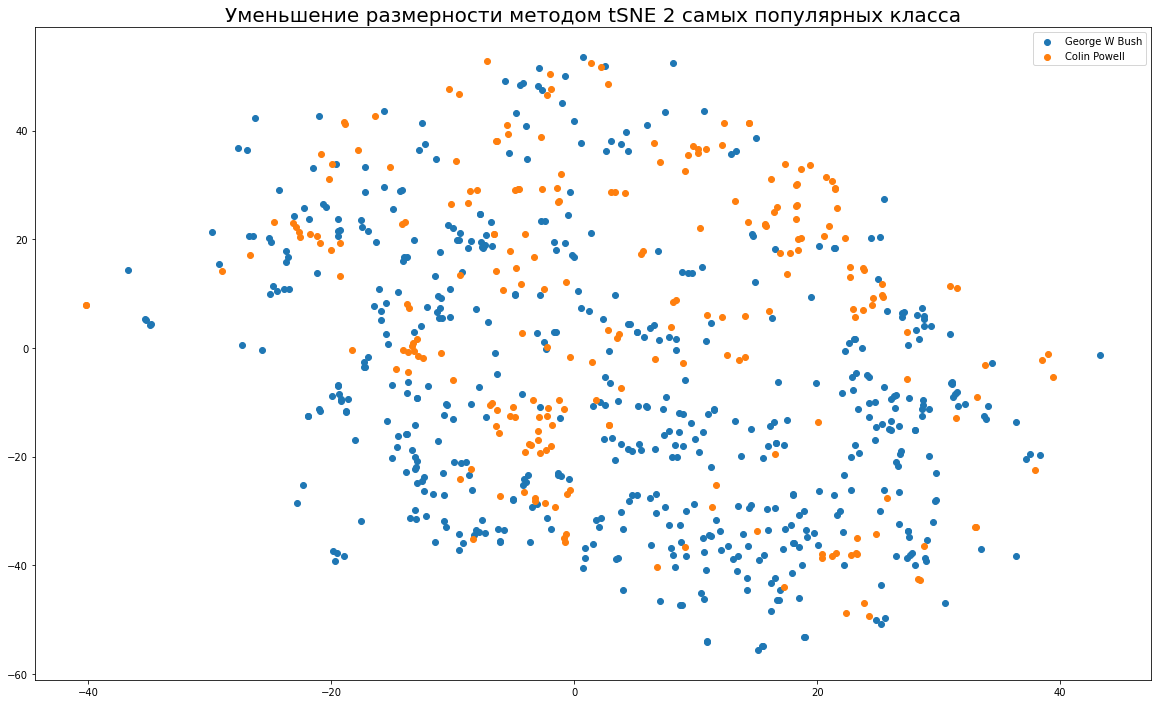

In [ ]:
most_frequent_classes = np.array(pd.Series(y).value_counts()[:2].index)
plt.figure(figsize=(20, 12))
for d in most_frequent_classes:
    plt.scatter(X_tsne_2[:, 0][y == d],
                X_tsne_2[:, 1][y == d],
                label=names[d])
plt.title(u"Уменьшение размерности методом tSNE 2 cамых популярных класса", fontsize=20)
plt.legend()

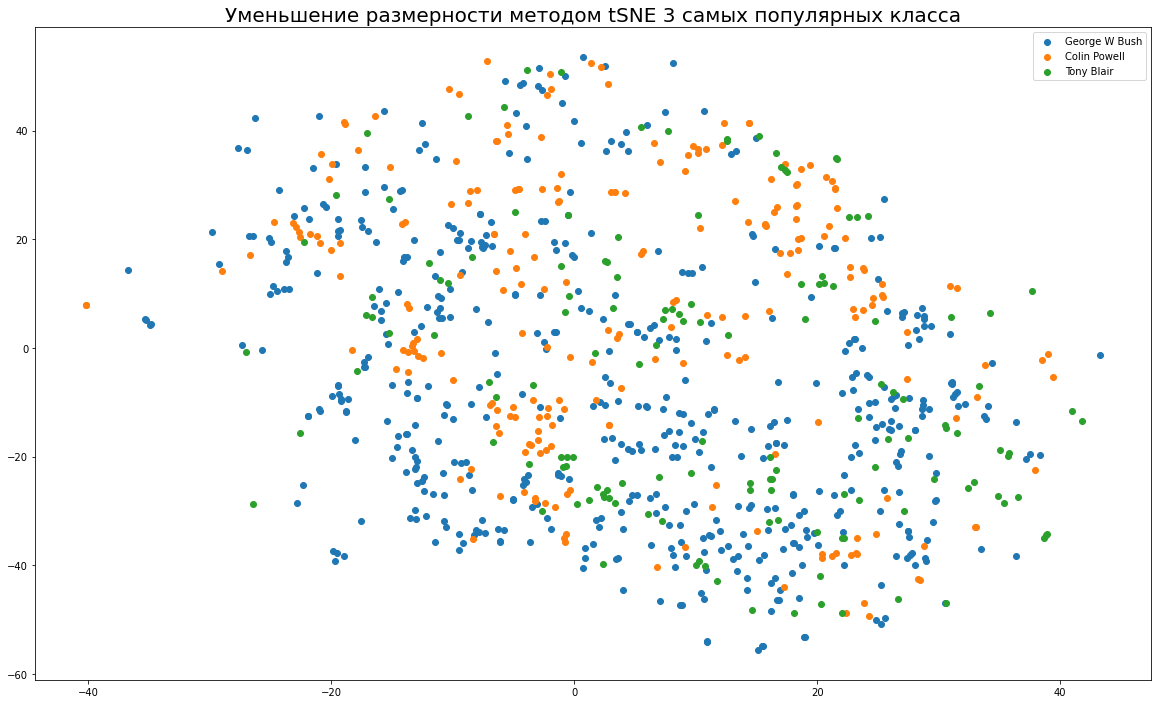

In [ ]:
most_frequent_classes = np.array(pd.Series(y).value_counts()[:3].index)
plt.figure(figsize=(20, 12))
for d in most_frequent_classes:
    plt.scatter(X_tsne_2[:, 0][y == d],
                X_tsne_2[:, 1][y == d],
                label=names[d])
plt.title(u"Уменьшение размерности методом tSNE 3 cамых популярных класса", fontsize=20)
plt.legend()

In [ ]:
pca = PCA(n_components=2)
X_pca_2 = pca.fit(X).transform(X)

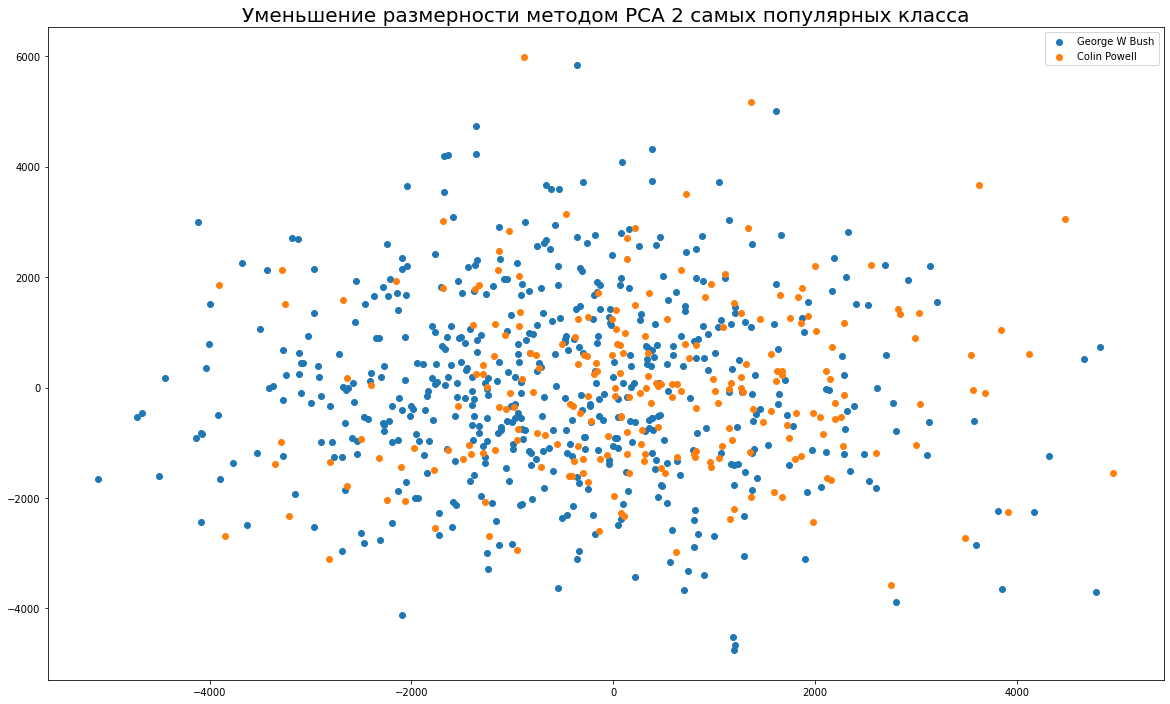

In [ ]:
most_frequent_classes = np.array(pd.Series(y).value_counts()[:2].index)
plt.figure(figsize=(20, 12))
for d in most_frequent_classes:
    plt.scatter(X_pca_2[:, 0][y == d],
                X_pca_2[:, 1][y == d],
                label=names[d])
plt.title(u"Уменьшение размерности методом PCA 2 cамых популярных класса", fontsize=20)
plt.legend()

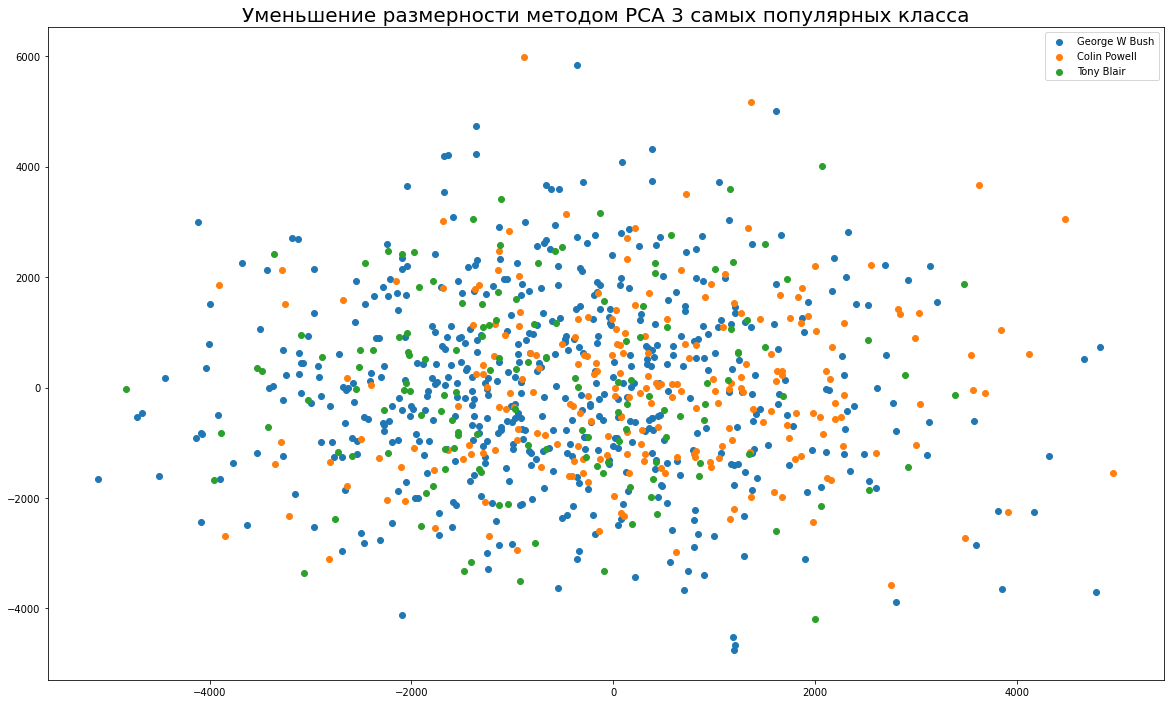

In [ ]:
most_frequent_classes = np.array(pd.Series(y).value_counts()[:3].index)
plt.figure(figsize=(20, 12))
for d in most_frequent_classes:
    plt.scatter(X_pca_2[:, 0][y == d],
                X_pca_2[:, 1][y == d],
                label=names[d])
plt.title(u"Уменьшение размерности методом PCA 3 cамых популярных класса", fontsize=20)
plt.legend()

Вывод по визулизации:

Результат обоих алгоритмом получился не очень, потому что по графикам кластеры определить трудно. Но все же результат получился лучше у TSNE, на его графике легче определить кластеры, чем на графике PCA (там все как в одной каше)
И на самом деле алгоритм tSNE должен справляться лучше, исходя из его внутренней реализации (раскидывание точек по кластерам используя физический смысл), чем PCA, который всего лишь ищет пространство, на которое проекции точек будут иметь наибольшую дисперсию